In [ ]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tm_long_data = yf.download("TM", period="max", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
tm_long_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM,TM
Date,,,,,,
1980-03-17,2.296797,3.291227,3.344743,3.291227,0.000000,41109
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409


In [ ]:
tm_long_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM,TM
Date,,,,,,
2025-01-07,193.119995,193.119995,194.970001,192.419998,194.589996,585500
2025-01-08,192.550003,192.550003,193.020004,191.520004,192.960007,436500
2025-01-10,183.470001,183.470001,186.350006,183.429993,185.690002,473000
2025-01-13,183.250000,183.250000,183.500000,181.479996,182.240005,310700
2025-01-14,185.410004,185.410004,185.940002,184.580002,185.559998,326000


In [ ]:
# check for the missing values
tm_long_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,TM,0
Close,TM,0
High,TM,0
Low,TM,0
Open,TM,0
Volume,TM,0


In [ ]:
tm_long_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11301 entries, 1980-03-17 to 2025-01-14
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Adj Close, TM)  11301 non-null  float64
 1   (Close, TM)      11301 non-null  float64
 2   (High, TM)       11301 non-null  float64
 3   (Low, TM)        11301 non-null  float64
 4   (Open, TM)       11301 non-null  float64
 5   (Volume, TM)     11301 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 618.0 KB


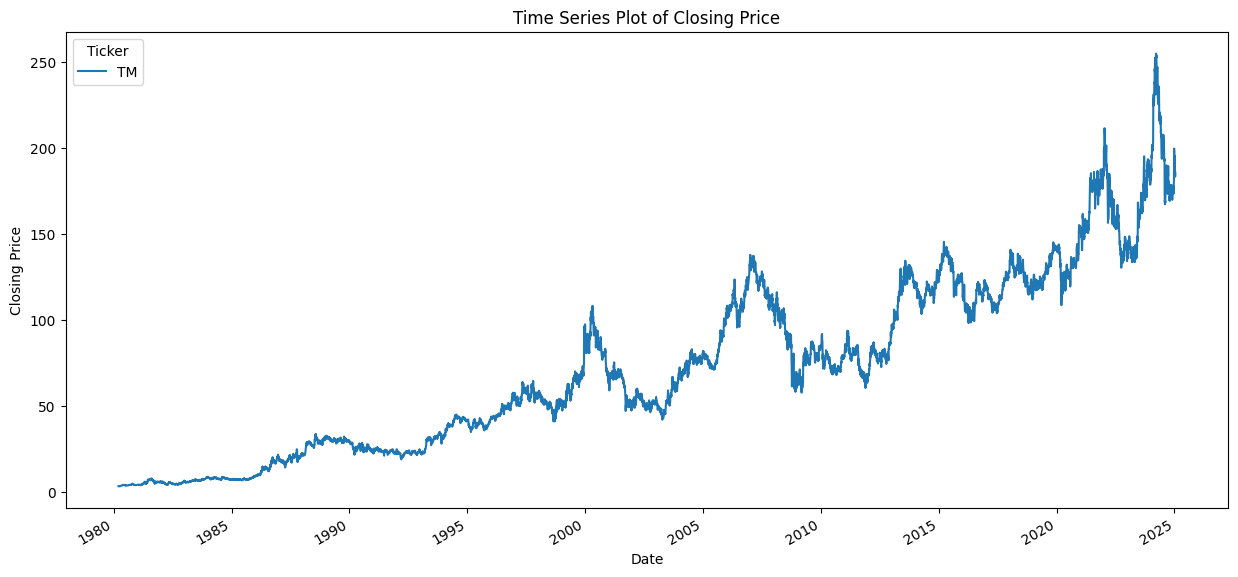

In [ ]:
# time series plot
tm_long_data['Close'].plot(figsize=(15,7))
plt.title('Time Series Plot of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

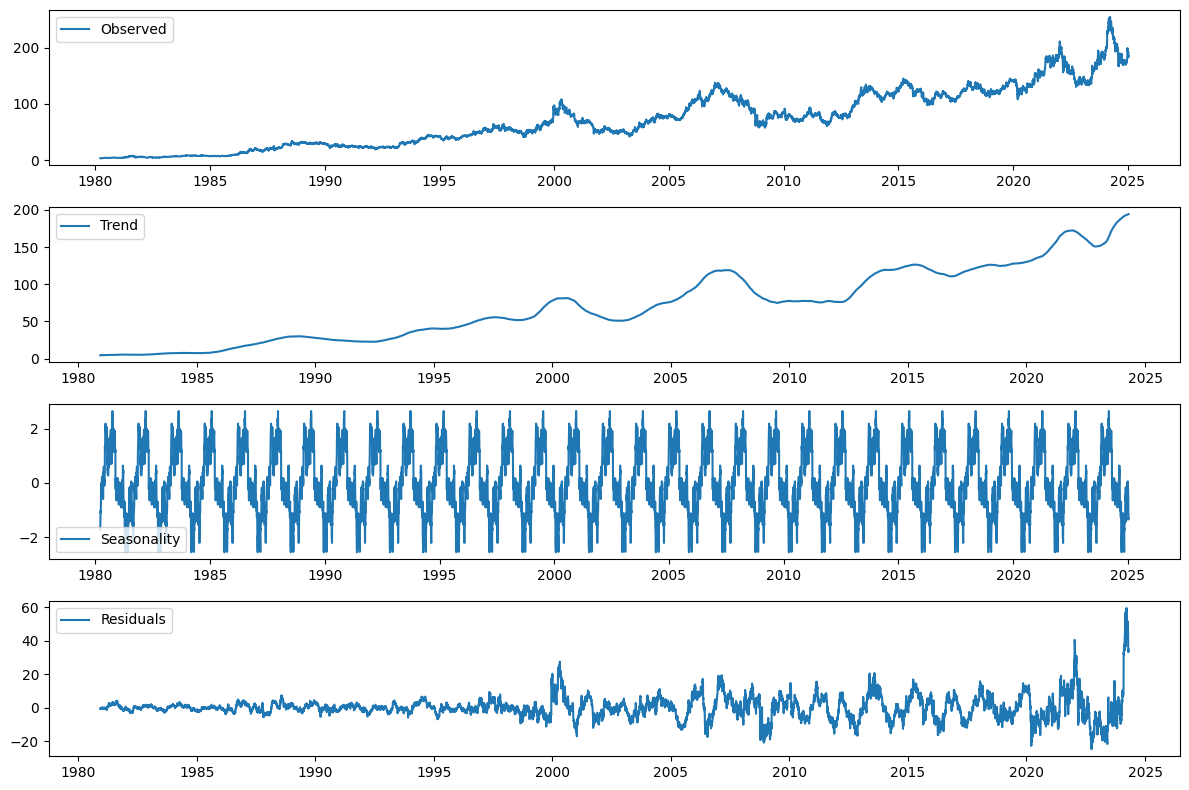

In [ ]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(tm_long_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

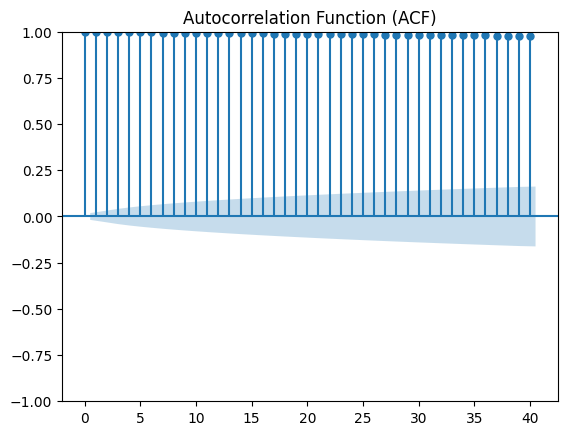

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(tm_long_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

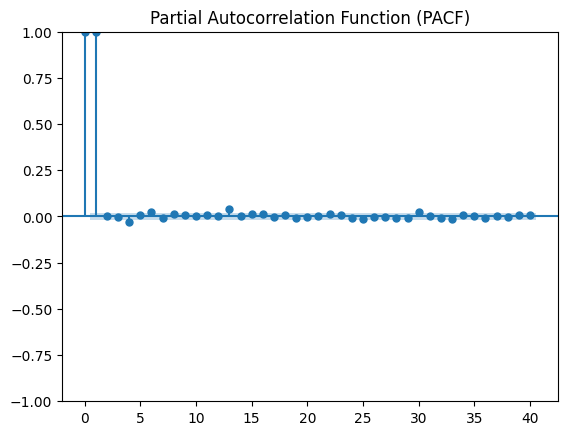

In [ ]:
plt.figure(figsize=(10, 5))
plot_pacf(tm_long_data['Close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
# get the Date out of the index
tm_long_data.reset_index(inplace=True)

In [ ]:
# isolet the Date and Sales columns
tm_long_data = tm_long_data[['Date', 'Close']]

In [ ]:
tm_long_data

Price,Date,Close
Ticker,,TM
0,1980-03-17,3.291227
1,1980-03-18,3.304606
2,1980-03-19,3.304606
3,1980-03-20,3.304606
4,1980-03-21,3.384880
...,...,...
11296,2025-01-07,193.119995
11297,2025-01-08,192.550003
11298,2025-01-10,183.470001


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(tm_long_data) * 0.8)  # 80% for training
train_data = tm_long_data[:train_size]
test_data = tm_long_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [ ]:
train_data

Price,Close
Ticker,TM
Date,
1980-03-17,3.291227
1980-03-18,3.304606
1980-03-19,3.304606
1980-03-20,3.304606
1980-03-21,3.384880
...,...
2016-01-12,115.830002
2016-01-13,114.989998


In [ ]:
test_data

Price,Close
Ticker,TM
Date,
2016-01-20,111.510002
2016-01-21,111.099998
2016-01-22,115.949997
2016-01-25,113.410004
2016-01-26,114.349998
...,...
2025-01-07,193.119995
2025-01-08,192.550003


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('1980-03-17 00:00:00'), Timestamp('2016-01-19 00:00:00'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2016-01-20 00:00:00'), Timestamp('2025-01-14 00:00:00'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0224
Epoch 2/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 1.9370e-04
Epoch 3/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 1.8524e-04
Epoch 4/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - loss: 1.7121e-04
Epoch 5/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 1.7056e-04
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
96.7218747138977


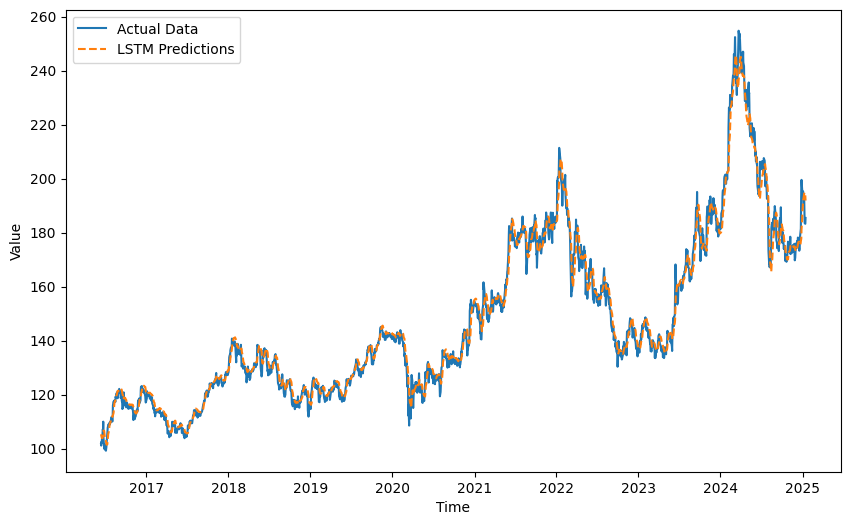

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

1.8640182272558057


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

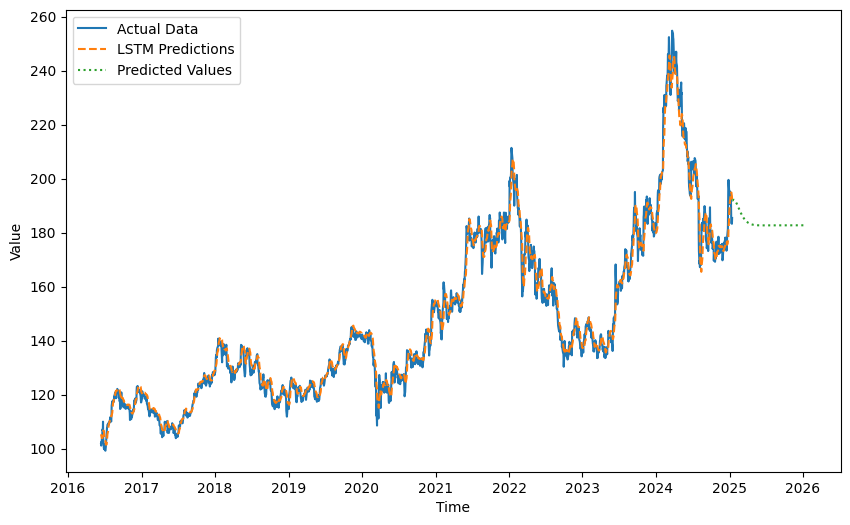

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
import yfinance as yf
import yfinance as yf

# Download data for TM with maximum interval with a period of one day

data = yf.download("TM", period="1d")

print(data)

SyntaxError: invalid decimal literal (<ipython-input-2-2facae4cd06a>, line 4)

In [ ]:
data = yf.download(
		tickers=['BTC-USD'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="max",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1d")